In [34]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino

# Lecture 09

#

In [35]:
# Lets import some libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import tensorflow as tf
%matplotlib inline


In [36]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random 

TEST_SIZE = 0.2


CMAP = plt.cm.brg
# plt.rcParams.update(params);
# plt.set_cmap(CMAP);

plt.style.use('bmh')
    
EPOCHS = 500 # number of epochs
BATCH_SIZE = 32 # batch size
ALPHA = 0.001 # learning rate
NUM_SAMPLES = 1280 # How many samples we want to generate
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2


In [37]:
# Function to plot history

def fn_plot_hist(hist_df):
    
    fig, axes = plt.subplots(1,2, figsize = (15, 6))
    
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.4, edgecolor = 'b')
    
    ax = axes[0]
    
    hist_df.plot(y = [hist_df.columns[0], hist_df.columns[2]], ax = ax, colormap=CMAP)
    
    lossmin = hist_df[hist_df.columns[0]].min()
    
    testmin = hist_df[hist_df.columns[2]].min()
    
    fmtStr = "Min {}: \n Testing : {:7.4f}\n Testing  : {:7.4f}"
    
    txtstr = fmtStr.format(hist_df.columns[0], lossmin, testmin) # test to plot
    
    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    
    ax.set_xlabel("Epochs")
    
    ax.set_ylabel(hist_df.columns[0].capitalize())
    
    ax = axes[1]
    
    hist_df.plot( y = [hist_df.columns[1], hist_df.columns[3]], ax = ax, colormap = CMAP)
    
    # little beautification
    accmin = hist_df[hist_df.columns[1]].max()
    
    testmin = hist_df[hist_df.columns[3]].max()
    
    fmtStr = "Max {}: \n Training : {:7.4f}\n Testing  : {:7.4f}"
    txtstr = fmtStr.format(hist_df.columns[1], accmin, testmin) # text to plot
    
    ax.text(0.4, 0.5, txtstr, transform = ax.transAxes, fontsize = 14, verticalalignment='top', bbox=props)
    
    ax.set_label("Epochs")
    
    ax.set_ylabel(hist_df.columns[1].capitalize())
    
    plt.tight_layout()
        

# Generate Data Set

#### Use sklearn dataset generate code

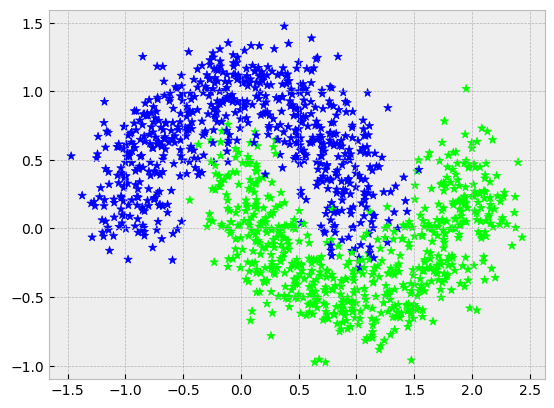

In [38]:
X, y = datasets.make_moons(n_samples = NUM_SAMPLES, shuffle = True, noise = NOISE, random_state=RANDOM_STATE)

# Lets Plot the data
plt.scatter(X[:,0], X[:,1], s=40, c=y, marker='*', cmap = CMAP);

In [39]:
def fn_plot_decision_boundary(model, X, y):
    
    # Set min and max values and give it some padding
    xMin, xMax = X[:, 0].min() - .05, X[:, 0].max() + .05
    yMin, yMax = X[:, 1].min() - .05, X[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.argmax(axis = 1) # Take max argument
    
    # Make its shape same as that of xx
    Z = Z.reshape(xx.shape)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and trainiing examples
    plt.contour(xx, yy, Z, cmap = CMAP, alpha = 0.6)
    
    # plot the points as well
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=CMAP, edgecolors='black')
    

In [40]:
# Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1024, 2) (1024,) (256, 2) (256,)


# Single neuron

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Prepare Model

Build `tf.keras.Sequential` model by taking `tf.keras.layers.Dense` 

In [42]:
tf.keras.layers.Dense?

Init signature:
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`). These are all attributes of
`Dense`.

Note: If the input to the layer has a rank greater than 2, then `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions 

In [43]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(32, activation='relu'))
# Now the model will take as input arrays of shape (None, 16)
# and output arrays of shape (None, 32).
# Note that after the first layer, you don't need to specify
# the size of the input anymore:

In [44]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(2) # Two outputs for two classes
    ])


In [45]:
X_train[0]

array([-1.12902116,  0.4913514 ])

In [46]:
X_train[0].shape

(2,)

In [47]:
X_train[:1]

array([[-1.12902116,  0.4913514 ]])

In [48]:
X_train[:1].shape

(1, 2)

In [49]:
predictions = model(X_train[:1])
predictions.numpy()

array([[ 1.3298739 , -0.87973315]], dtype=float32)

In [50]:
predictions = model(X_train[:1])
predictions.numpy().sum()

0.45014077

In [51]:
tf.nn.softmax(predictions).numpy().sum()

1.0

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (1, 4)                    12        
                                                                 
 dense_5 (Dense)             (1, 2)                    10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
import sys
sys.float_info.max, sys.float_info.min

(1.7976931348623157e+308, 2.2250738585072014e-308)

In [54]:
np.log(sys.float_info.max)

709.782712893384

In [55]:
np.exp(709)

8.218407461554972e+307

In [56]:
# np.exp(710)

In [57]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [58]:
y_test.shape

(256,)

In [59]:
print(y_test)

[1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1
 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0]


In [60]:
y_train[:1]

array([0], dtype=int64)

In [61]:
loss_fn(y_train[:1], predictions).numpy()

0.1041291

#### always  give ? to get code

In [62]:
model.compile?

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
      a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where `y_true` are the ground truth values, and
      `y_pred` are the model's predictions.
      `y_t

In [63]:
# model.fit?

## Compile the model:
- Loss Function
- Optimizer
- list metrices to monitor

## Fit the model
- Training features
- Training target
- validations
- batch size
- epochs

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA),
              loss=loss_fn,
              metrics=['accuracy'])


history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose='auto',
    validation_data=[X_test, y_test])

Epoch 1/500
32/32 [==============================] - 1s 14ms/step - loss: 0.3308 - accuracy: 0.8643 - val_loss: 0.2512 - val_accuracy: 0.8945
Epoch 2/500
32/32 [==============================] - 0s 4ms/step - loss: 0.3290 - accuracy: 0.8643 - val_loss: 0.2496 - val_accuracy: 0.9023
Epoch 3/500
32/32 [==============================] - 0s 4ms/step - loss: 0.3279 - accuracy: 0.8652 - val_loss: 0.2488 - val_accuracy: 0.9023
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 0.3266 - accuracy: 0.8662 - val_loss: 0.2477 - val_accuracy: 0.9023
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 0.3258 - accuracy: 0.8672 - val_loss: 0.2477 - val_accuracy: 0.9023
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.8672 - val_loss: 0.2464 - val_accuracy: 0.9023
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.3238 - accuracy: 0.8691 - val_loss: 0.2456 - val_accuracy: 0.9023
Epoch 8/500


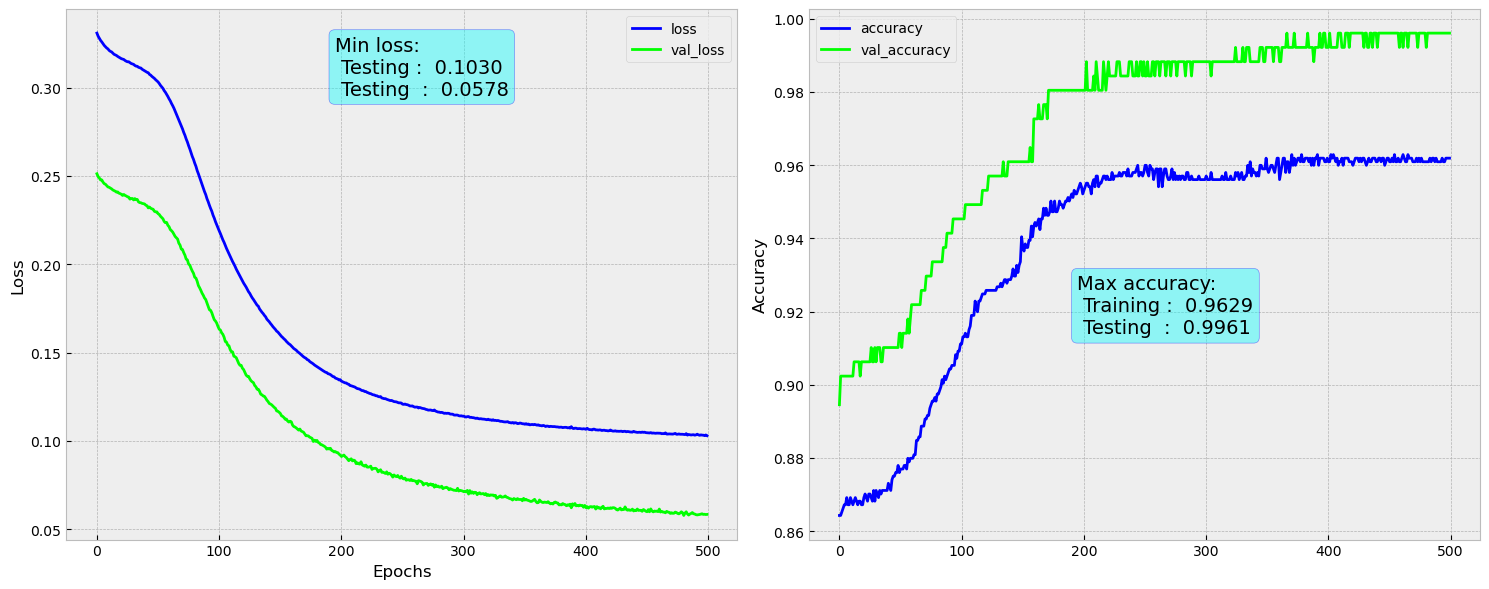

In [65]:
hist_df = pd.DataFrame(history.history)
fn_plot_hist(hist_df)

In [66]:
hist_df[hist_df['val_loss']== hist_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy
480,0.103709,0.960938,0.057846,0.992188


6636/6636 [==============================] - 14s 2ms/step


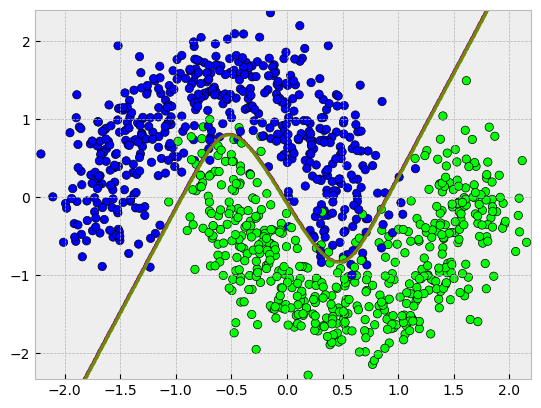

In [67]:
fn_plot_decision_boundary(model,X_train,y_train)